### Fifa 22 Complete Player df_mainset [UPD:01/10/21]

##### Content

Replaced positions that do not exist in fifa, for example ["LS", "RS"] with "ST".
And a few more brief introductory notes:

- monetary values in Euro;
- height in cm;
- weight in kg;
- players without clubs in the Clubs column - "Free agent"
- players who are not include to national teams in the column "NationalTeam" - "Not in team"

---

##### Hypotesis
- **Hypothesis 1**: Players with higher potential ratings are typically younger and command a higher market value.
- **Hypothesis 2**: The overall rating of a player is strongly correlated with their market value and wage.

- **Question 1**: Which players have the highest growth potential and could represent high-value acquisitions for clubs looking to invest in future talent?
- **Question 2**: What are the key attributes that differentiate high-value players from lower-value players?
- **Question 3**: How does a player's physical attributes, such as height and weight, correlate with their overall and potential ratings?



In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('players_fifa22.csv')

#### Checking what columns we have in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

In [4]:

# 3df.iloc[:, 30:]
df.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,1.926000e+04,...,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000
mean,231682.741952,25.184683,181.305036,74.950779,65.815628,71.100104,5.284476,1598.525909,357.062461,2.857652e+06,...,58.364434,57.227207,58.364434,56.197040,55.771340,56.197040,55.539823,54.379595,55.539823,23.242939
std,26960.272515,4.737340,6.866151,7.066864,6.817297,6.092103,5.472201,271.575855,39.910613,7.604532e+06,...,13.989045,13.212152,13.989045,13.818416,13.856922,13.818416,14.063862,14.678658,14.063862,15.053823
min,41.000000,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000,767.000000,227.000000,0.000000e+00,...,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,16.000000,18.000000,16.000000,10.000000
25%,214903.500000,21.000000,176.000000,70.000000,62.000000,67.000000,0.000000,1462.000000,329.000000,4.750000e+05,...,54.000000,52.000000,54.000000,51.000000,48.000000,51.000000,49.000000,44.000000,49.000000,17.000000
50%,236687.500000,25.000000,181.000000,75.000000,66.000000,71.000000,4.000000,1633.000000,358.000000,9.750000e+05,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,253607.500000,29.000000,186.000000,80.000000,70.000000,75.000000,9.000000,1782.000000,384.000000,2.000000e+06,...,67.000000,66.000000,67.000000,65.000000,66.000000,65.000000,65.000000,66.000000,65.000000,20.000000
max,264705.000000,54.000000,206.000000,110.000000,93.000000,95.000000,26.000000,2341.000000,501.000000,1.940000e+08,...,93.000000,91.000000,93.000000,88.000000,90.000000,88.000000,88.000000,89.000000,88.000000,92.000000


#### Checking missing values

In [5]:
df.isna().sum().sort_values(ascending=False)

NationalNumber       18503
NationalPosition     18503
ClubNumber              76
ContractUntil           76
ClubPosition            76
                     ...  
DefensiveWorkRate        0
AttackingWorkRate        0
SkillMoves               0
WeakFoot                 0
GKRating                 0
Length: 90, dtype: int64

#### Selecting relevant columns
- Since this dataset consists of 90 columns so I will exclude all the columns I think are irrelevant for my hypotheses.
##### Column meanings
- I've never played FIFA so im going to guess what these stats mean.
    - `Overall` = Final evaluation of players skills.
    - `Potential` = Players potential
    - `Growth` = Difference between Potential and Overall
    - `TotalStats` = Maximum skills the player can achieve.
    - `BaseStats` = Skills the player starts with.
    - `WeakFoot` = Every player has prefered foot, this value ranges from 1 to 5 and represents how good is the player when not using prefered foot (higher = better).
    - `SkillMoves` = Determines how many tricks the player can pull off (creativity during play?).

In [6]:
df_main = df.copy()
df_main = df_main.loc[:, ['Age', 'Height', 'Weight', 'Overall', 'Potential', 'Growth', 'TotalStats', 'BaseStats', 'ValueEUR', 'WageEUR', 'WeakFoot', 'SkillMoves', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']]
df_main.isna().sum().sort_values(ascending=False)

Age                 0
Height              0
DefendingTotal      0
DribblingTotal      0
PassingTotal        0
ShootingTotal       0
PaceTotal           0
SkillMoves          0
WeakFoot            0
WageEUR             0
ValueEUR            0
BaseStats           0
TotalStats          0
Growth              0
Potential           0
Overall             0
Weight              0
PhysicalityTotal    0
dtype: int64

##### 

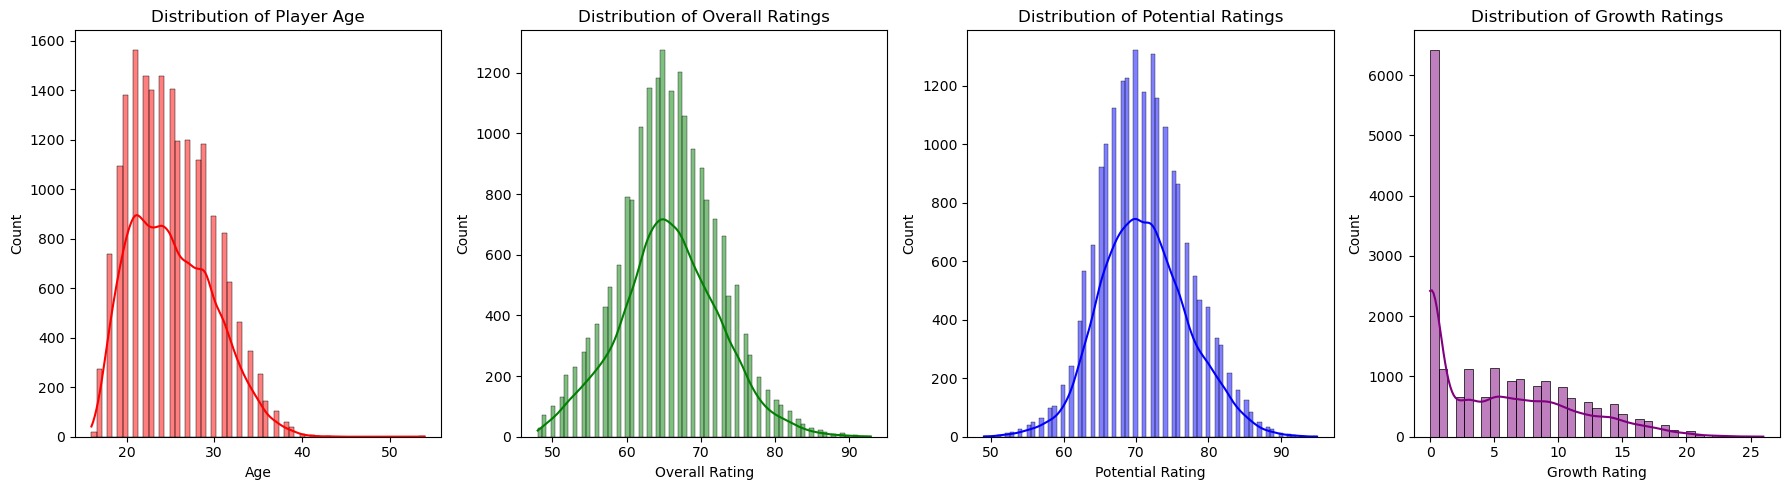

In [40]:

# Plot distribution of Age, Overall, and Potential
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.histplot(df_main['Age'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Distribution of Player Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(df_main['Overall'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Overall Ratings')
axes[1].set_xlabel('Overall Rating')

sns.histplot(df_main['Potential'], kde=True, ax=axes[2], color='blue')
axes[2].set_title('Distribution of Potential Ratings')
axes[2].set_xlabel('Potential Rating')

sns.histplot(df_main['Growth'], kde=True, ax=axes[3], color='purple')
axes[3].set_title('Distribution of Growth Ratings')
axes[3].set_xlabel('Growth Rating')

plt.tight_layout()
plt.show()


####  Which players have the highest growth potential and could represent high-value acquisitions for clubs looking to invest in future talent?

In [8]:
# # select all numerical columns
# df_num = df.select_dtypes(include=[np.number])
# corr_num = df_num.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr_num, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix of FIFA Player Attributes')
# plt.show()

# which players have the highest growth potential


#### Let's take a look at column corelations

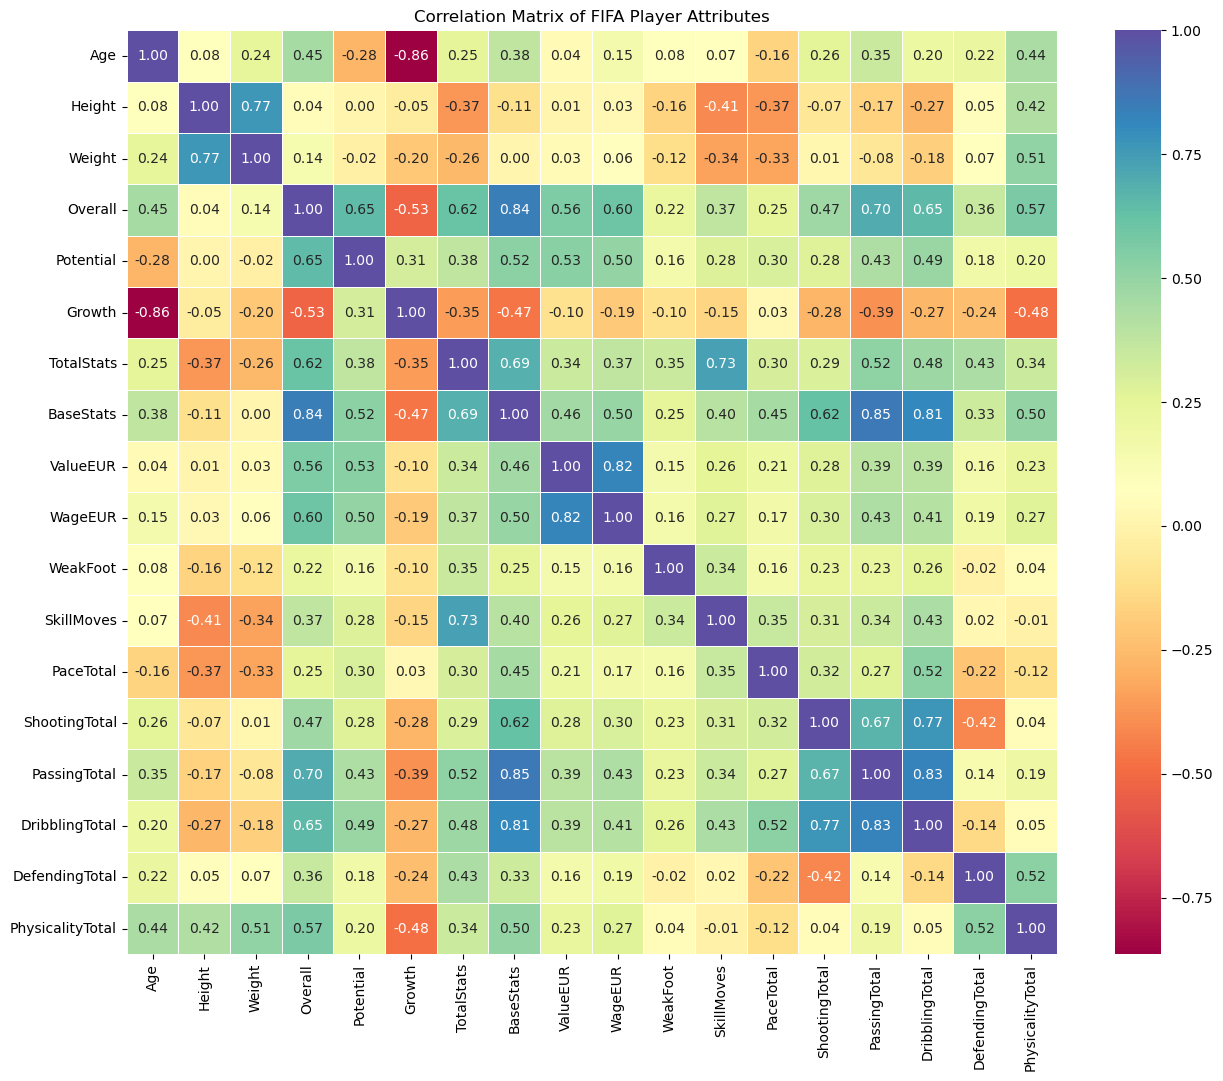

In [36]:
corr_matrix = df_main.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of FIFA Player Attributes')
plt.show()

<Axes: xlabel='Potential', ylabel='Age'>

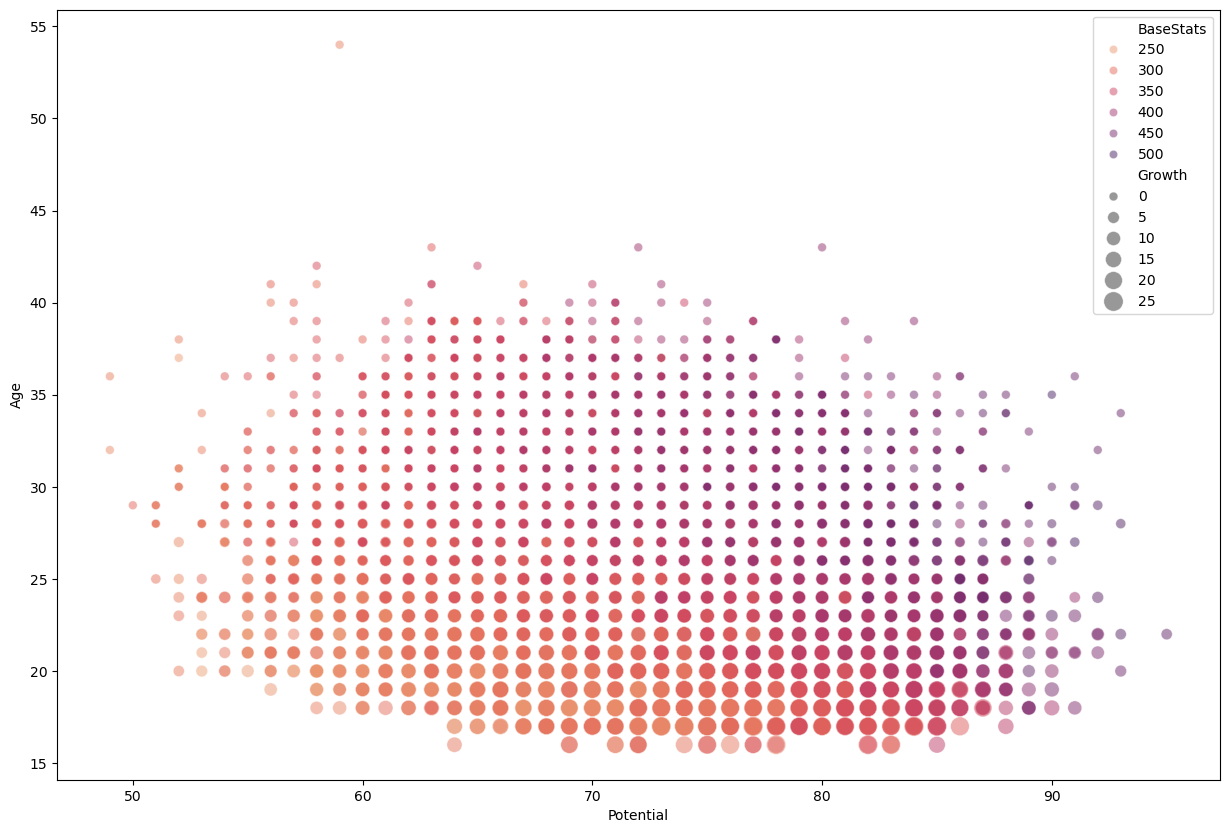

In [37]:
# sns.pairplot(df_main, diag_kind='kde', corner=True, markers='o', plot_kws={'alpha': 0.5})
# Which players have the highest growth potential and could represent high-value acquisitions for clubs looking to invest in future talent?
# sns.scatterplot(x='Potential', y='Age', data=df_main, alpha=0.5)
plt.figure(figsize=(15, 10))
# sns.boxplot(x='Growth', y='Age', data=df_main)
sns.scatterplot(x='Potential', y='Age', data=df_main, alpha=0.5, hue='BaseStats', palette='flare', size='Growth', sizes=(40, 200))
